# Compare P1D archives from Gadget and Nyx suites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lace.emulator import p1d_archive
from lace_manager.emulator import p1d_archive_Nyx

### Read Gadget sim suite (Pedersen et al. 2021)

# models = 990


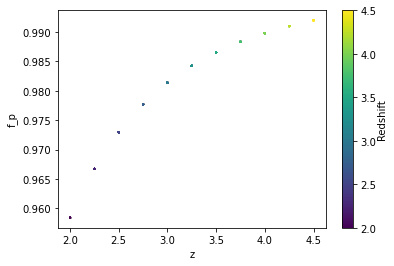

In [2]:
basedir='lace/emulator/sim_suites/Australia20/'
skewers_label='Ns500_wM0.05'
gadget=p1d_archive.archiveP1D(basedir=basedir,skewers_label=skewers_label,verbose=False)
print('# models =',len(gadget.data))
gadget.plot_samples('z','f_p')

### Read Nyx sim suite (Walther et al. 202?)

will read Nyx file /global/u2/f/font/Projects/nyx_files/all_model_outputs_with_lP.hdf5
number of samples 14
parameter names ['A_UVB', 'A_lya', 'A_s', 'H_0', 'Omega_m', 'h', 'n_lya', 'n_s', 'omega_m', 'sigma8']
will use redshift grid [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 5.0, 5.4]
thermal grid ['thermal_grid_0', 'thermal_grid_1', 'thermal_grid_10', 'thermal_grid_11', 'thermal_grid_12', 'thermal_grid_13', 'thermal_grid_14', 'thermal_grid_2', 'thermal_grid_3', 'thermal_grid_4', 'thermal_grid_5', 'thermal_grid_6', 'thermal_grid_7', 'thermal_grid_8', 'thermal_grid_9']
cosmo_grid_0 params {'A_UVB': 1.217857142857143, 'A_lya': 10.285709844334082, 'A_s': 2.265935e-09, 'H_0': 64.60714285714286, 'Omega_m': 0.36314563782035697, 'h': 0.6460714285714286, 'n_lya': -2.368573003251007, 'n_s': 0.9425047, 'omega_m': 0.15158, 'sigma8': 0.8780869478586525}
cosmo_grid_1 params {'A_UVB': 0.9035714285714286, 'A_lya': 9.257130364192312, 'A_s': 1.42575e-09, 'H_0': 70.35000000000001,

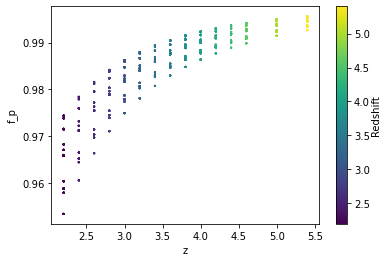

In [3]:
#nyx_fname='/global/cfs/projectdirs/desi/users/schabanier/models.hdf5'
nyx_fname='/global/u2/f/font/Projects/nyx_files/all_model_outputs_with_lP.hdf5'
nyx=p1d_archive_Nyx.archiveP1D_Nyx(fname=nyx_fname,verbosity=2)
print('# models =',len(nyx.data))
nyx.plot_samples('z','f_p')

### Compare archive entries

In [4]:
def compare_archives(param1,param2):
    plt.figure()
    plt.title('Gadget')
    gadget.plot_samples(param1,param2)
    plt.figure()
    plt.title('Nyx')
    nyx.plot_samples(param1,param2)

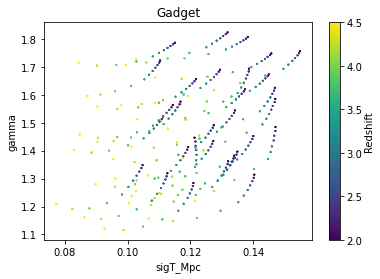

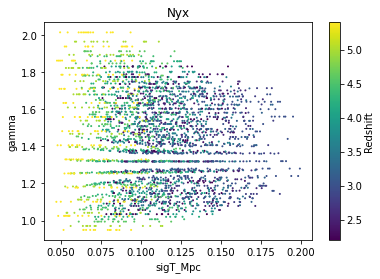

In [5]:
compare_archives('sigT_Mpc','gamma')

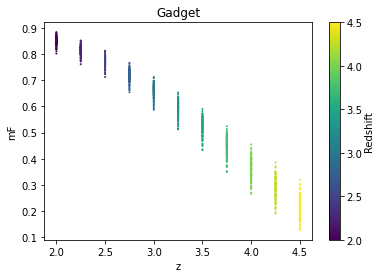

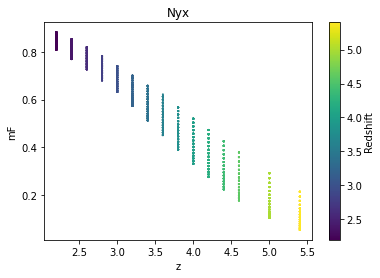

In [6]:
compare_archives('z','mF')

In [7]:
#nyx.plot_samples('z','kF_Mpc')

0 does not contain kF_Mpc
1 does not contain kF_Mpc
2 does not contain kF_Mpc
3 does not contain kF_Mpc
4 does not contain kF_Mpc
5 does not contain kF_Mpc
6 does not contain kF_Mpc
7 does not contain kF_Mpc
8 does not contain kF_Mpc
9 does not contain kF_Mpc
10 does not contain kF_Mpc
11 does not contain kF_Mpc
12 does not contain kF_Mpc
13 does not contain kF_Mpc
14 does not contain kF_Mpc
15 does not contain kF_Mpc
16 does not contain kF_Mpc
17 does not contain kF_Mpc
18 does not contain kF_Mpc
19 does not contain kF_Mpc
20 does not contain kF_Mpc
21 does not contain kF_Mpc
22 does not contain kF_Mpc
23 does not contain kF_Mpc
24 does not contain kF_Mpc
25 does not contain kF_Mpc
26 does not contain kF_Mpc
27 does not contain kF_Mpc
28 does not contain kF_Mpc
29 does not contain kF_Mpc
30 does not contain kF_Mpc
31 does not contain kF_Mpc
32 does not contain kF_Mpc
33 does not contain kF_Mpc
34 does not contain kF_Mpc
35 does not contain kF_Mpc
36 does not contain kF_Mpc
37 does not

Text(0, 0.5, 'kF_Mpc')

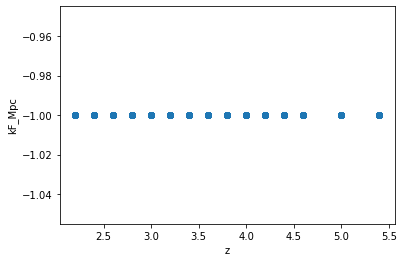

In [8]:
emu_data=nyx.data
Nemu=len(emu_data)
# figure out parameter values
par_key='kF_Mpc'
par_val=np.empty(Nemu)
for i in range(Nemu):
    if par_key not in emu_data[i]:
        print(i,'does not contain',par_key)
        val=-1
    else:
        val=emu_data[i][par_key]
    par_val[i]=val
#par_val=np.array([emu_data[i][par_key] for i in range(Nemu)])
z_val=np.array([emu_data[i]['z'] for i in range(Nemu)])
plt.scatter(z_val,par_val)
plt.xlabel('z')
plt.ylabel(par_key)